In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Keras Imports
from keras import datasets
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D

Using TensorFlow backend.


# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

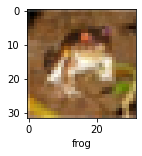

In [5]:
plot_sample(X_train, y_train, 0)

# Normalize training data before training the neural net

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [6]:
X_train = X_train/255
X_test = X_test/255

# Now build the Sequential Model and add layers into it

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
    
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),)
model.add(MaxPooling2D((2, 2)),)

model.add(Flatten())
model.add(Dense(64, activation="relu"))
# model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 37s 743us/step - loss: 1.4924 - accuracy: 0.4617
Epoch 2/10
50000/50000 [==============================] - 40s 808us/step - loss: 1.1474 - accuracy: 0.5981
Epoch 3/10
50000/50000 [==============================] - 41s 818us/step - loss: 1.0118 - accuracy: 0.6463s - loss: 1.0122 - ac
Epoch 4/10
50000/50000 [==============================] - 41s 822us/step - loss: 0.9255 - accuracy: 0.6770s - loss: 0.9250 - accura
Epoch 5/10
50000/50000 [==============================] - 40s 794us/step - loss: 0.8697 - accuracy: 0.6958
Epoch 6/10
50000/50000 [==============================] - 41s 829us/step - loss: 0.8199 - accuracy: 0.7153
Epoch 7/10
50000/50000 [==============================] - 41s 828us/step - loss: 0.7716 - accuracy: 0.7311s - los
Epoch 8/10
50000/50000 [==============================] - 43s 858us/step - loss: 0.7320 - accuracy: 0.7446
Epoch 9/10
50000/50000 [==============================] - 45s 907us/step - loss: 0.6966 - a

# Evaluation of Model

In [11]:
acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 196us/step


In [12]:
print('The accuracy is' , round(acc[1], 3))

The accuracy is 0.694


Text(69.0, 0.5, 'Truth')

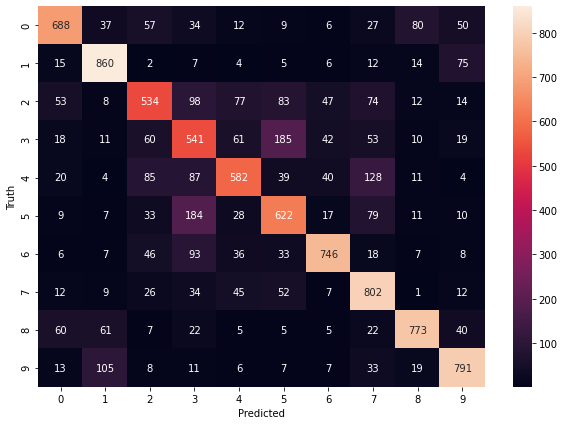

In [14]:
import tensorflow as tf

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      1000
           1       0.78      0.86      0.82      1000
           2       0.62      0.53      0.57      1000
           3       0.49      0.54      0.51      1000
           4       0.68      0.58      0.63      1000
           5       0.60      0.62      0.61      1000
           6       0.81      0.75      0.78      1000
           7       0.64      0.80      0.71      1000
           8       0.82      0.77      0.80      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

